In [15]:
import os
from keras import layers
from keras import models
import matplotlib.pyplot as plt

In [2]:
samuel_images_test_dir = 'data/samuel_images_test'
samuel_images_train_dir = 'data/samuel_images_train'

In [3]:
model = models.Sequential()
model.add(layers.SeparableConv2D(32, (3, 3), activation='relu',
                        input_shape=(400, 600, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.SeparableConv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 398, 598, 32)      155       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 199, 299, 32)      0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 197, 297, 64)      2400      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 148, 64)       0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 96, 146, 128)      8896      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 73, 128)       0         
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 46, 71, 128)       17664     
__________

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        samuel_images_train_dir,
        target_size=(400, 600),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        samuel_images_test_dir,
        target_size=(400, 600),
        batch_size=20,
        class_mode='binary')

Found 896 images belonging to 2 classes.
Found 383 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
 27/100 [=======>......................] - ETA: 5:33 - loss: 0.6781 - acc: 0.5981

/usr/local/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


100/100 [==============================] - 507s 5s/step - loss: 0.6846 - acc: 0.5705 - val_loss: 0.6824 - val_acc: 0.5694
Epoch 2/30
100/100 [==============================] - 499s 5s/step - loss: 0.6732 - acc: 0.5852 - val_loss: 0.6646 - val_acc: 0.5704
Epoch 3/30
100/100 [==============================] - 496s 5s/step - loss: 0.6674 - acc: 0.5800 - val_loss: 0.6416 - val_acc: 0.6449
Epoch 4/30
100/100 [==============================] - 499s 5s/step - loss: 0.6384 - acc: 0.6326 - val_loss: 0.6161 - val_acc: 0.7340
Epoch 5/30
100/100 [==============================] - 495s 5s/step - loss: 0.6179 - acc: 0.6580 - val_loss: 0.5616 - val_acc: 0.7702
Epoch 6/30
100/100 [==============================] - 493s 5s/step - loss: 0.5988 - acc: 0.6809 - val_loss: 0.5252 - val_acc: 0.7319
Epoch 7/30
100/100 [==============================] - 492s 5s/step - loss: 0.5674 - acc: 0.7100 - val_loss: 0.4887 - val_acc: 0.7712
Epoch 8/30
100/100 [==============================] - 497s 5s/step - loss: 0.546

### Save Model

In [13]:
model.save('data/samuel_images_model_{}.h5'.format(time.time()))

### Plot The ROC

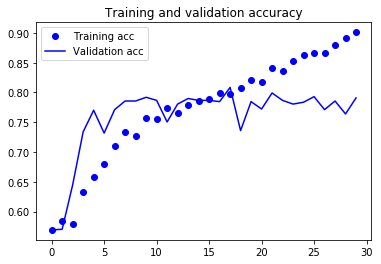

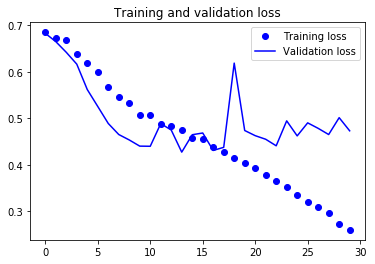

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()